In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles


import math
import statistics
from collections import Counter

In [2]:
import matplotlib.pyplot as plt

In [3]:
food = pd.read_csv('./food.csv')

In [4]:
stool = pd.read_csv('./stool.csv')

## food 데이터 하루씩 밀기

In [5]:
from datetime import timedelta

In [6]:
food_1d = food

In [7]:
food_1d['date'] = pd.DatetimeIndex(food_1d['date']) + pd.DateOffset(1)

In [8]:
stool['date'] = pd.to_datetime(stool['date'])

In [9]:
food_1d['date'].dtype

dtype('<M8[ns]')

In [10]:
stool['date'].dtype

dtype('<M8[ns]')

In [11]:
food_1d

,id,date,time,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus
0,gaori,2019-08-03,19:30,2,0,0.0,0.0,0,1.0,300,0,0
1,gaori,2019-08-03,22:00,0,0,0.0,0.0,1,0.0,100,1,0
2,gaori,2019-08-04,12:00,0,0,0.0,0.0,0,0.0,500,0,0
3,gaori,2019-08-04,15:00,0,0,0.0,0.0,0,0.0,200,0,0
4,gaori,2019-08-04,20:30,0,0,0.0,0.0,0,0.0,300,1,0
5,gaori,2019-08-04,9:30,2,0,0.0,0.0,0,1.0,300,0,1
6,gaori,2019-08-05,11:00,0,0,0.0,0.0,0,0.0,300,0,0
7,gaori,2019-08-05,15:30,0,0,0.0,0.0,0,0.0,200,0,0
8,gaori,2019-08-05,18:00,0,0,0.0,0.0,0,0.0,0,0,0
9,gaori,2019-08-05,19:30,0,0,0.0,1.0,0,0.0,200,0,0


## 하루에 먹은 것들 sum

In [12]:
food_1d = food_1d.groupby(['id','date']).sum().reset_index() # 여기서 시간 날라감.

In [13]:
food_1d

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus
0,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0
1,gaori,2019-08-04,2,0,0.0,0.0,0,1.0,1300,1,1
2,gaori,2019-08-05,0,0,0.0,1.0,0,0.0,700,0,0
3,gaori,2019-08-06,0,0,0.0,1.0,0,0.0,1600,0,0
4,gaori,2019-08-07,0,0,0.0,0.0,0,0.0,1700,1,0
5,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,2300,0,2
6,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,400,0,1
7,gaori,2019-08-10,1,0,0.0,0.0,0,2.0,700,1,2
8,gaori,2019-08-11,2,1,0.0,0.0,1,2.0,1100,0,1
9,gaori,2019-08-12,2,0,0.0,0.0,1,1.0,600,0,2


## food 하루 민 데이터와 stool 데이터 merge

In [14]:
fs_1d = pd.merge(food_1d, stool, on = ['id','date'])

In [15]:
fs_1d

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus,time,minute,feel,menstruation
0,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0,9:00,5.0,2.0,0
1,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0,9:50,3.0,2.0,0
2,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0,19:00,10.0,2.0,0
3,gaori,2019-08-04,2,0,0.0,0.0,0,1.0,1300,1,1,10:30,5.0,2.0,0
4,gaori,2019-08-05,0,0,0.0,1.0,0,0.0,700,0,0,10:00,2.0,3.0,0
5,gaori,2019-08-06,0,0,0.0,1.0,0,0.0,1600,0,0,8:30,2.0,3.0,0
6,gaori,2019-08-06,0,0,0.0,1.0,0,0.0,1600,0,0,9:00,5.0,3.0,0
7,gaori,2019-08-07,0,0,0.0,0.0,0,0.0,1700,1,0,8:30,5.0,2.0,0
8,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,2300,0,2,8:30,5.0,3.0,0
9,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,2300,0,2,7:30,5.0,3.0,0


## food 데이터 이틀씩 밀기

In [16]:
food_2d = food
food_2d['date'] = pd.DatetimeIndex(food_2d['date']) + pd.DateOffset(2)

In [17]:
food_2d = food_2d.groupby(['id','date']).sum().reset_index() # 여기서 시간 날라감.

## 이틀 민 food 데이터와 stool merge

In [18]:
fs_2d = pd.merge(food_2d, stool, on = ['id','date'])

In [19]:
fs_2d

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus,time,minute,feel,menstruation
0,gaori,2019-08-05,2,0,0.0,0.0,1,1.0,400,1,0,10:00,2.0,3.0,0
1,gaori,2019-08-06,2,0,0.0,0.0,0,1.0,1300,1,1,8:30,2.0,3.0,0
2,gaori,2019-08-06,2,0,0.0,0.0,0,1.0,1300,1,1,9:00,5.0,3.0,0
3,gaori,2019-08-07,0,0,0.0,1.0,0,0.0,700,0,0,8:30,5.0,2.0,0
4,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,1600,0,0,8:30,5.0,3.0,0
5,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,1600,0,0,7:30,5.0,3.0,0
6,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,1700,1,0,9:00,1.0,3.0,0
7,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,1700,1,0,18:00,5.0,3.0,0
8,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,1700,1,0,20:00,15.0,2.0,0
9,gaori,2019-08-10,0,0,0.0,1.0,0,0.0,2300,0,2,23:00,15.0,2.0,0


## 멤버별 히트맵

### gaori

In [54]:
# 하루 민 히트맵
data = fs_1d[fs_1d['id'] == 'gaori']
sum_corr = data.corr().sum().sort_values(ascending=True).index.values

data[sum_corr].corr()
# .sum().sort_values(ascending=True)
# sns.heatmap(data, annot=True, fmt = '.2f', linewidths=0.2)

,coffee,feel,menstruation,soda,water,minute,lactobacillus,alcohol,greens,cold,milk,spicy
coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feel,NaN,1.000000,0.027637,0.009956,0.221610,-0.470863,0.166187,-0.213789,-0.353329,-0.101083,-0.081929,-0.192835
menstruation,NaN,0.027637,1.000000,-0.101845,-0.046683,0.042583,-0.164776,0.116703,0.016023,0.091880,-0.150883,0.117263
soda,NaN,0.009956,-0.101845,1.000000,0.157065,0.003414,-0.007812,-0.134438,0.253180,0.122038,-0.088830,-0.221513
water,NaN,0.221610,-0.046683,0.157065,1.000000,-0.076802,0.076585,-0.182319,0.016871,-0.081452,0.076270,-0.140859
minute,NaN,-0.470863,0.042583,0.003414,-0.076802,1.000000,0.135543,0.178762,0.242712,0.186623,0.120447,0.298146
lactobacillus,NaN,0.166187,-0.164776,-0.007812,0.076585,0.135543,1.000000,0.021634,-0.157697,0.050700,0.485363,0.112921
alcohol,NaN,-0.213789,0.116703,-0.134438,-0.182319,0.178762,0.021634,1.000000,0.120049,0.116703,0.196209,0.520839
greens,NaN,-0.353329,0.016023,0.253180,0.016871,0.242712,-0.157697,0.120049,1.000000,0.201749,0.216467,0.317340
cold,NaN,-0.101083,0.091880,0.122038,-0.081452,0.186623,0.050700,0.116703,0.201749,1.000000,0.168148,0.203560


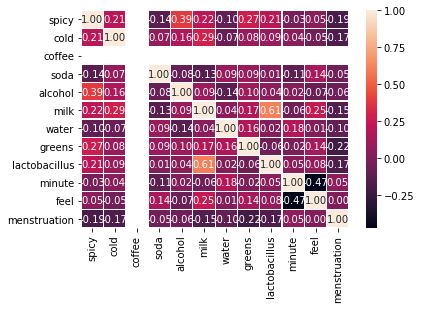

In [21]:
# 이틀 민 히트맵
sns.heatmap(fs_2d[fs_2d['id'] == 'gaori'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

In [22]:
food['id'].unique()

array(['gaori', 'squirrel', 'kairos', 'panda', 'hae', 'wolf'],
      dtype=object)

### squirrel

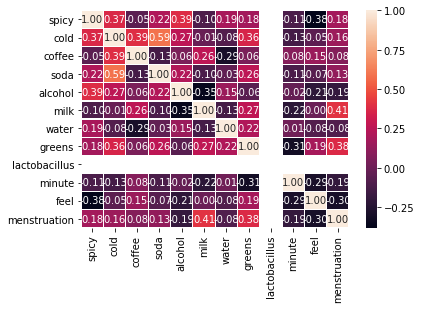

In [23]:
# 하루 민 히트맵
sns.heatmap(fs_1d[fs_1d['id'] == 'squirrel'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

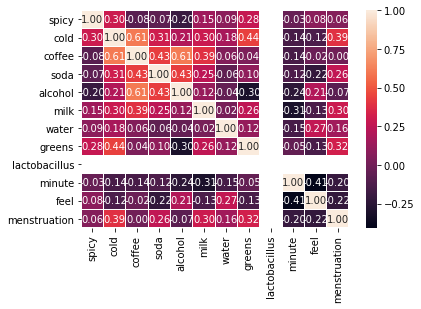

In [24]:
# 이틀 민 히트맵
sns.heatmap(fs_2d[fs_2d['id'] == 'squirrel'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

### kairos

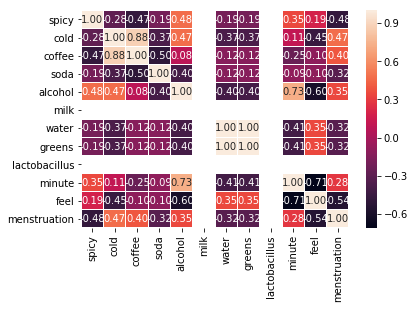

In [25]:
# 하루 민 히트맵
sns.heatmap(fs_1d[fs_1d['id'] == 'kairos'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

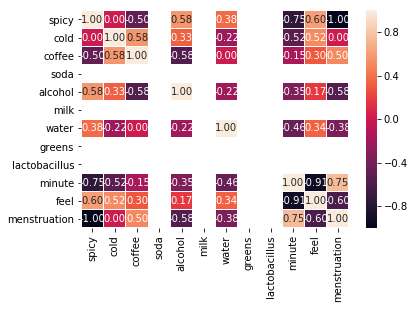

In [26]:
# 이틀 민 히트맵
sns.heatmap(fs_2d[fs_2d['id'] == 'kairos'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

### panda

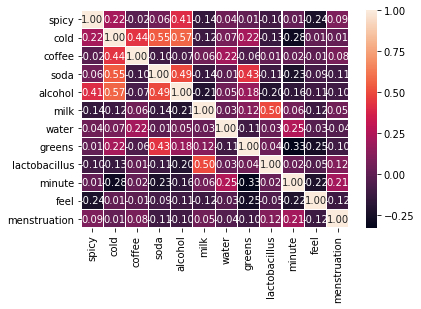

In [27]:
# 하루 민 히트맵
sns.heatmap(fs_1d[fs_1d['id'] == 'panda'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

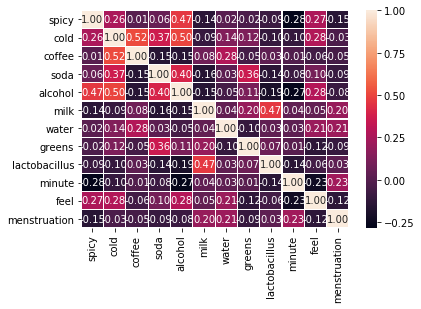

In [28]:
# 이틀 민 히트맵
sns.heatmap(fs_2d[fs_2d['id'] == 'panda'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

### haedal

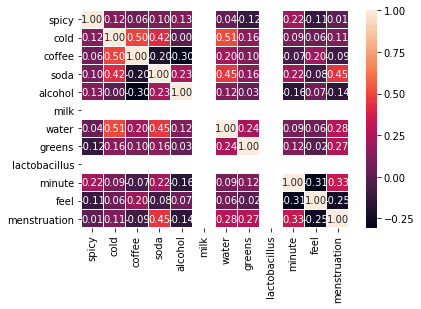

In [29]:
# 하루 민 히트맵
sns.heatmap(fs_1d[fs_1d['id'] == 'hae'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

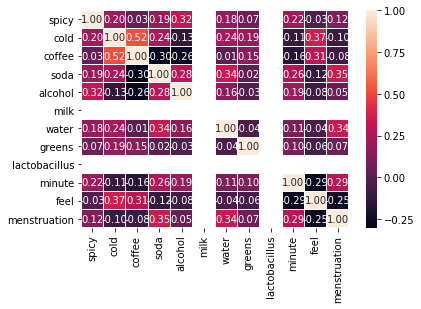

In [30]:
# 이틀 민 히트맵
sns.heatmap(fs_2d[fs_2d['id'] == 'hae'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

### wolf

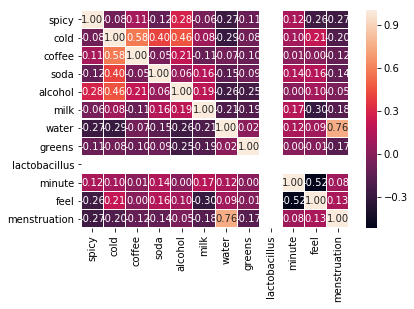

In [31]:
# 하루 민 히트맵
sns.heatmap(fs_1d[fs_1d['id'] == 'wolf'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

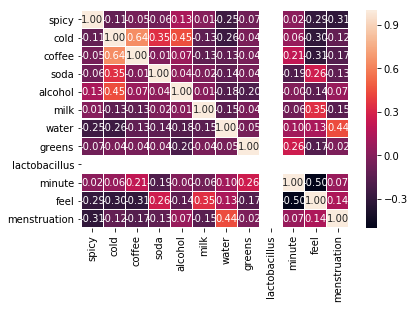

In [32]:
# 이틀 민 히트맵
sns.heatmap(fs_2d[fs_2d['id'] == 'wolf'].corr(), annot=True, fmt = '.2f', linewidths=0.2)

# Regression
회귀는 하루민 데이터로 하겠습니다.

In [33]:
from statsmodels.formula.api import ols

## 후방 선택 함수
adj.Rsqured를 리턴

In [34]:
def backward_minute(pm, d):
    
    pm_l =[]
    pm2_l= []
    pm2 =''
    pm2_d={}
    for i in range(len(pm)):
        pm1 = pm[0:i] + pm[i+1:]
        pm_l.append(pm1)

    for j in pm_l:
        for k in j:
            if k == j[-1]:
                pm2 += k
            else:
                pm2 += k +'+' 
        pm2_l.append(pm2)
        pm2_d[pm2] = ols('minute ~ ' + pm2, data = d).fit().rsquared_adj
        pm2=''
    return max(pm2_d.items())

In [35]:
def backward_feel(pm, d):
    
    pm_l =[]
    pm2_l= []
    pm2 =''
    pm2_d={}
    for i in range(len(pm)):
        pm1 = pm[0:i] + pm[i+1:]
        pm_l.append(pm1)

    for j in pm_l:
        for k in j:
            if k == j[-1]:
                pm2 += k
            else:
                pm2 += k +'+' 
        pm2_l.append(pm2)
        pm2_d[pm2] = ols('feel ~ ' + pm2, data = d).fit().rsquared_adj
        pm2=''
    return max(pm2_d.items())

### 멤버별 회귀

### gaori

In [36]:
# stool 데이터로만
res_gaori_stool = ols('feel ~ minute + menstruation', data = fs_1d[fs_1d['id'] == 'gaori']).fit()

In [36]:
res_gaori_stool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   feel   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     11.83
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           3.05e-05
Time:                        11:22:39   Log-Likelihood:                -52.241
No. Observations:                  85   AIC:                             110.5
Df Residuals:                      82   BIC:                             117.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8841      0.083     34.730      0.000       2.719       3.049
minute          -0.0683      0.014     -4.857      0.000      -0.096      -0.040
menstruation     0.0674      0.137      0.491      0.625      -0.206       0.341
==============================================================================
Omnibus:                       16.402   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.799
Skew:                          -1.059   Prob(JB):                     8.28e-05
Kurtosis:                       3.908   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# feel과 음식군 
res_gaori_feel = ols('feel ~ spicy + cold + coffee + soda + alcohol + milk + water + greens', data = fs_1d[fs_1d['id'] == 'gaori']).fit()

In [38]:
res_gaori_feel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   feel   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.713
Date:                Fri, 18 Oct 2019   Prob (F-statistic):             0.0144
Time:                        11:22:39   Log-Likelihood:                -53.649
No. Observations:                  85   AIC:                             123.3
Df Residuals:                      77   BIC:                             142.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5728      0.103     25.082      0.000       2.369       2.777
spicy          0.0289      0.089      0.324      0.747      -0.149       0.206
cold          -0.0164      0.152     -0.108      0.914      -0.319       0.286
coffee      2.971e-17   3.13e-17      0.949      0.346   -3.26e-17    9.21e-17
soda           0.0746      0.133      0.562      0.576      -0.190       0.339
alcohol       -0.2037      0.167     -1.220      0.226      -0.536       0.129
milk           0.0081      0.109      0.075      0.941      -0.208       0.224
water          0.0001   7.18e-05      1.837      0.070   -1.11e-05       0.000
greens        -0.3542      0.113     -3.145      0.002      -0.578      -0.130
==============================================================================
Omnibus:                       12.923   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.710
Skew:                          -0.898   Prob(JB):                      0.00105
Kurtosis:                       3.802   Cond. No.                     9.55e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
# minute과 음식군
res_gaori_minute = ols('feel ~ spicy + cold + coffee + soda + alcohol + milk + water + greens', data = fs_1d[fs_1d['id'] == 'gaori']).fit()

In [40]:
res_gaori_minute.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   feel   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.713
Date:                Fri, 18 Oct 2019   Prob (F-statistic):             0.0144
Time:                        11:22:40   Log-Likelihood:                -53.649
No. Observations:                  85   AIC:                             123.3
Df Residuals:                      77   BIC:                             142.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5728      0.103     25.082      0.000       2.369       2.777
spicy          0.0289      0.089      0.324      0.747      -0.149       0.206
cold          -0.0164      0.152     -0.108      0.914      -0.319       0.286
coffee      2.971e-17   3.13e-17      0.949      0.346   -3.26e-17    9.21e-17
soda           0.0746      0.133      0.562      0.576      -0.190       0.339
alcohol       -0.2037      0.167     -1.220      0.226      -0.536       0.129
milk           0.0081      0.109      0.075      0.941      -0.208       0.224
water          0.0001   7.18e-05      1.837      0.070   -1.11e-05       0.000
greens        -0.3542      0.113     -3.145      0.002      -0.578      -0.130
==============================================================================
Omnibus:                       12.923   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.710
Skew:                          -0.898   Prob(JB):                      0.00105
Kurtosis:                       3.802   Cond. No.                     9.55e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 후방 선택 해보기
재명님이 후방 선택 해보라고 하셔서 한번 해봤어요!
함수화를 완전히 다 하지는 못해서 이렇게 변수 하나씩 줄어들 때마다 하는 식으로 해봤습니다!

In [63]:
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']

In [64]:
# 시간으로
backward_minute(pm, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 0.06195908189234034)

In [65]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm1, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.0630560144737009)

In [66]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm2, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+soda+milk+water+greens+lactobacillus', 0.07286882643059989)

In [67]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm3, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+soda+water+greens+lactobacillus', 0.0813544221919793)

In [68]:
## 이거!!!
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_minute(pm4, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+water+greens+lactobacillus', 0.09271542753997108)

In [238]:
res_gaori_minute = ols('minute ~ spicy+water+greens+lactobacillus', data = fs_1d[fs_1d['id'] == 'gaori']).fit()

In [239]:
res_gaori_minute.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 minute   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.146
Date:                Fri, 18 Oct 2019   Prob (F-statistic):             0.0187
Time:                        18:04:24   Log-Likelihood:                -221.31
No. Observations:                  85   AIC:                             452.6
Df Residuals:                      80   BIC:                             464.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8618      0.698      5.536      0.000       2.474       5.250
spicy             0.9699      0.524      1.849      0.068      -0.074       2.014
water            -0.0003      0.000     -0.587      0.559      -0.001       0.001
greens            1.3382      0.749      1.787      0.078      -0.152       2.828
lactobacillus     0.8602      0.623      1.380      0.171      -0.380       2.101
==============================================================================
Omnibus:                       38.071   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.942
Skew:                           1.675   Prob(JB):                     2.65e-18
Kurtosis:                       6.411   Cond. No.                     3.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 매운거

In [157]:
fs_1d['spicy'].dtype

dtype('int64')

In [160]:
fs_1d_spicy = fs_1d[(fs_1d['id'] == 'gaori') & (fs_1d['spicy'] != 0)]

In [176]:
fs_1d_spicy 

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus,time,minute,feel,menstruation
0,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0,9:00,5.0,2.0,0
1,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0,9:50,3.0,2.0,0
2,gaori,2019-08-03,2,0,0.0,0.0,1,1.0,400,1,0,19:00,10.0,2.0,0
3,gaori,2019-08-04,2,0,0.0,0.0,0,1.0,1300,1,1,10:30,5.0,2.0,0
13,gaori,2019-08-10,1,0,0.0,0.0,0,2.0,700,1,2,23:00,15.0,2.0,0
14,gaori,2019-08-11,2,1,0.0,0.0,1,2.0,1100,0,1,19:00,5.0,3.0,0
15,gaori,2019-08-12,2,0,0.0,0.0,1,1.0,600,0,2,19:00,5.0,3.0,0
20,gaori,2019-08-17,1,0,0.0,1.0,0,0.0,1100,0,1,17:00,1.0,3.0,0
32,gaori,2019-08-31,1,0,0.0,0.0,0,0.0,0,1,0,NaN,4.5,2.0,0
48,gaori,2019-09-14,3,1,0.0,0.0,1,0.0,700,1,0,10:00,5.0,2.0,1


In [163]:
fs_1d_no_spicy = fs_1d[(fs_1d['id'] == 'gaori') & (fs_1d['spicy'] == 0)]

In [177]:
fs_1d_no_spicy

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus,time,minute,feel,menstruation
4,gaori,2019-08-05,0,0,0.0,1.0,0,0.0,700,0,0,10:00,2.0,3.0,0
5,gaori,2019-08-06,0,0,0.0,1.0,0,0.0,1600,0,0,8:30,2.0,3.0,0
6,gaori,2019-08-06,0,0,0.0,1.0,0,0.0,1600,0,0,9:00,5.0,3.0,0
7,gaori,2019-08-07,0,0,0.0,0.0,0,0.0,1700,1,0,8:30,5.0,2.0,0
8,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,2300,0,2,8:30,5.0,3.0,0
9,gaori,2019-08-08,0,0,0.0,1.0,0,0.0,2300,0,2,7:30,5.0,3.0,0
10,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,400,0,1,9:00,1.0,3.0,0
11,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,400,0,1,18:00,5.0,3.0,0
12,gaori,2019-08-09,0,0,0.0,0.0,0,0.0,400,0,1,20:00,15.0,2.0,0
16,gaori,2019-08-13,0,0,0.0,0.0,0,2.0,500,0,3,16:00,3.0,3.0,0


In [169]:
fs_1d_spicy['minute'].mean()

6.466666666666667

In [166]:
fs_1d_no_spicy['minute'].mean()

4.164285714285715

In [ ]:
## 야채

In [224]:
fs_1d_greens = fs_1d[(fs_1d['id'] == 'gaori') & (fs_1d['greens'] != 0)]
fs_1d_no_greens = fs_1d[(fs_1d['id'] == 'gaori') & (fs_1d['greens'] == 0)]

In [171]:
fs_1d_greens['minute'].mean()

5.9655172413793105

In [172]:
fs_1d_no_greens['minute'].mean()

3.8482142857142856

### 가오리님 회귀 결과로 spicy, greens  시간 차이 시각화

In [217]:
minute_spicy_greens = [6.466666666666667, 4.164285714285715]
bars1 = ('spicy', 'no spicy')
bars2 = ('greens', 'no greens')
y_pos = np.arange(len(bars1))
minute_no_spicy_greens = [5.9655172413793105, 3.8482142857142856]

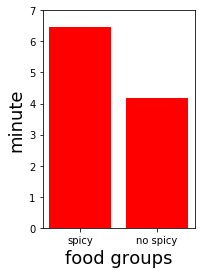

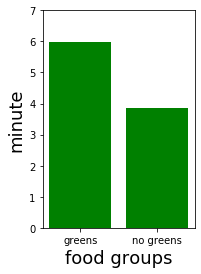

In [218]:
plt.subplot(1,2,1)
plt.bar(y_pos, minute_spicy_greens, color = 'red')
plt.xlabel( 'food groups', fontsize = 18)
plt.ylabel( 'minute', fontsize = 18)
plt.ylim(0,7)
plt.xticks(y_pos, bars1)
plt.show()
plt.subplot(1,2,2)
plt.bar(y_pos, minute_no_spicy_greens, color = 'green')
plt.xlabel( 'food groups', fontsize = 18)
plt.ylabel( 'minute', fontsize = 18)
plt.ylim(0,7)
plt.xticks(y_pos, bars2)
plt.show()

In [69]:
pm5 = ['spicy', 'water', 'greens','lactobacillus']
backward_minute(pm5, fs_1d[fs_1d['id'] == 'gaori'])

('water+greens+lactobacillus', 0.0656115392076091)

In [70]:
# 기분으로
backward_feel(pm, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 0.12659919996158386)

In [71]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm1, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.137839105362226)

In [72]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm2, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+soda+milk+water+greens+lactobacillus', 0.13552997945280276)

In [73]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm3, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+soda+water+greens+lactobacillus', 0.14128474824677262)

In [74]:
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_feel(pm4, fs_1d[fs_1d['id'] == 'gaori'])

('spicy+water+greens+lactobacillus', 0.14982882958088395)

In [75]:
## 이거!!
pm5 = ['spicy', 'water', 'greens','lactobacillus']
backward_feel(pm5, fs_1d[fs_1d['id'] == 'gaori'])

('water+greens+lactobacillus', 0.15529423453153546)

In [173]:
fs_1d_spicy['feel'].mean()

2.4

In [175]:
fs_1d_no_spicy['feel'].mean()

2.6214285714285714

In [76]:
pm6 = ['water', 'greens','lactobacillus']
backward_feel(pm6, fs_1d[fs_1d['id'] == 'gaori'])

('water+lactobacillus', 0.04886123150721733)

### 가오리님 회귀 결과로 spicy, greens 기분 차이 시각화

In [240]:
feel_spicy_greens = [2.4, 2.6214285714285714]
bars1 = ('spicy', 'no spicy')
y_pos = np.arange(len(bars))

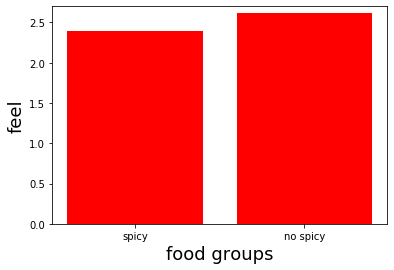

In [241]:
plt.bar(y_pos, feel_spicy_greens, color = 'red')
plt.xlabel( 'food groups', fontsize = 18)
plt.ylabel( 'feel', fontsize = 18)
plt.ylim(0,2.7)
plt.xticks(y_pos, bars1)
plt.show()

gaori님 데이터는 후방 선택할 수록 adj.rsqured가 늘어나네요!
haedal 할 때는 줄어들수록 adj.rsqured가 줄어들었었어요!


### squirrel

### 후방 선택 해보기

In [179]:
# 시간으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_minute(pm, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+cold+soda+alcohol+milk+water+greens', -0.015249487254125782)

In [180]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_minute(pm1, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+soda+alcohol+milk+water+greens', 0.007976307243689806)

In [181]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_minute(pm2, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+soda+milk+water+greens', 0.02581613370023006)

In [182]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens']
backward_minute(pm3, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+soda+water+greens', 0.025988942614559418)

In [183]:
pm4 = ['spicy', 'soda', 'water', 'greens']
backward_minute(pm4, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+water+greens', 0.048117720398864194)

In [184]:
## 이거!
pm5 = ['spicy', 'water', 'greens']
backward_minute(pm5, fs_1d[fs_1d['id'] == 'squirrel'])

('water+greens', 0.0640008866909827)

In [185]:
fs_1d_spicy_greens = fs_1d[(fs_1d['id'] == 'squirrel') & ((fs_1d['spicy'] != 0) | (fs_1d['greens'] != 0))]

In [186]:
fs_1d_no_spicy_greens = fs_1d[(fs_1d['id'] == 'squirrel') & ((fs_1d['spicy'] == 0) | (fs_1d['greens'] == 0))]

In [188]:
fs_1d_spicy_greens['minute'].mean()

4.384615384615385

In [189]:
fs_1d_no_spicy_greens['minute'].mean()

4.72

In [83]:
pm6 = ['water', 'greens','lactobacillus']
backward_minute(pm6, fs_1d[fs_1d['id'] == 'squirrel'])

('water+lactobacillus', -0.021552145419144297)

In [84]:
# 기분으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 0.11183823064267961)

In [86]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm1, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.1319095394698775)

In [88]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm2, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+soda+milk+water+greens+lactobacillus', 0.1493433837027318)

In [89]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm3, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+soda+water+greens+lactobacillus', 0.14576409687197123)

In [91]:
## 이거!!
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_feel(pm4, fs_1d[fs_1d['id'] == 'squirrel'])

('spicy+water+greens+lactobacillus', 0.16201681456096262)

In [92]:
pm5 = ['spicy', 'water', 'greens','lactobacillus']
backward_feel(pm5, fs_1d[fs_1d['id'] == 'squirrel'])

('water+greens+lactobacillus', 0.008896737030109403)

In [93]:
pm6 = [ 'water', 'greens','lactobacillus']
backward_feel(pm6, fs_1d[fs_1d['id'] == 'squirrel'])

('water+lactobacillus', -0.014739498790067307)

### kairos

In [94]:
# 시간으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 0.27035175879397033)

In [95]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm1, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.16331658291457285)

In [96]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm2, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+soda+milk+water+greens+lactobacillus', -0.2012060301507539)

In [97]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm3, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+soda+water+greens+lactobacillus', -0.2012060301507539)

In [99]:
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_minute(pm4, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+water+greens+lactobacillus', -0.010050251256281229)

In [100]:
pm5 = ['spicy', 'water', 'greens','lactobacillus']
backward_minute(pm5, fs_1d[fs_1d['id'] == 'kairos'])

('water+greens+lactobacillus', 0.0470208183776023)

In [101]:
pm6 = [ 'water', 'greens','lactobacillus']
backward_minute(pm6, fs_1d[fs_1d['id'] == 'kairos'])

('water+lactobacillus', 0.0470208183776023)

In [102]:
#기분으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus', 0.4880000000000002)

In [103]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm1, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.5800000000000001)

In [104]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm2, fs_1d[fs_1d['id'] == 'kairos'])

('spicy+soda+milk+water+greens+lactobacillus', -0.29600000000000026)

### panda

In [105]:
# 시간으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm, fs_1d[fs_1d['id'] == 'panda'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 0.06612544959662725)

In [106]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm1, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.04276388969316092)

In [107]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm2, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+milk+water+greens+lactobacillus', 0.05270775434165509)

In [108]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm3, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+water+greens+lactobacillus', 0.0629497713050865)

In [109]:
## 이거!!
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_minute(pm4, fs_1d[fs_1d['id'] == 'panda'])

('spicy+water+greens+lactobacillus', 0.07242422272109106)

## 판다님 회귀 결과로 spicy, greens 시간 차이 시각화

In [232]:
fs_1d_food_panda = fs_1d[(fs_1d['id'] == 'panda') & ((fs_1d['spicy'] != 0) | (fs_1d['greens'] != 0) | (fs_1d['lactobacillus'] != 0))]
fs_1d_no_food_panda = fs_1d[(fs_1d['id'] == 'panda') & ((fs_1d['spicy'] == 0) | (fs_1d['greens'] == 0) | (fs_1d['lactobacillus'] == 0))]

In [231]:
fs_1d_food_panda

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus,time,minute,feel,menstruation
168,panda,2019-08-03,1,1,0.0,0.0,1,0.0,1000,0,1,1:00,10.0,2.0,0
169,panda,2019-08-03,1,1,0.0,0.0,1,0.0,1000,0,1,23:30,10.0,3.0,0
170,panda,2019-08-04,4,2,0.0,0.0,1,0.0,500,0,1,NaN,NaN,NaN,0
171,panda,2019-08-05,2,0,0.0,1.0,0,0.0,500,0,1,NaN,NaN,NaN,0
172,panda,2019-08-06,3,2,0.0,0.0,1,0.0,0,0,1,15:00,3.0,3.0,0
173,panda,2019-08-07,3,0,0.0,0.0,0,0.0,500,0,1,NaN,NaN,NaN,0
174,panda,2019-08-08,0,1,0.0,0.0,0,0.0,1000,0,1,19:00,5.0,3.0,0
176,panda,2019-08-10,1,3,2.0,0.0,0,0.0,500,0,1,17:50,3.0,3.0,1
177,panda,2019-08-11,2,0,0.0,0.0,0,0.0,300,0,1,12:10,15.0,2.0,1
178,panda,2019-08-12,0,1,0.0,0.0,0,0.0,600,0,1,NaN,NaN,NaN,0


In [233]:
fs_1d_no_food_panda

,id,date,spicy,cold,coffee,soda,alcohol,milk,water,greens,lactobacillus,time,minute,feel,menstruation
168,panda,2019-08-03,1,1,0.0,0.0,1,0.0,1000,0,1,1:00,10.0,2.0,0
169,panda,2019-08-03,1,1,0.0,0.0,1,0.0,1000,0,1,23:30,10.0,3.0,0
170,panda,2019-08-04,4,2,0.0,0.0,1,0.0,500,0,1,NaN,NaN,NaN,0
171,panda,2019-08-05,2,0,0.0,1.0,0,0.0,500,0,1,NaN,NaN,NaN,0
172,panda,2019-08-06,3,2,0.0,0.0,1,0.0,0,0,1,15:00,3.0,3.0,0
173,panda,2019-08-07,3,0,0.0,0.0,0,0.0,500,0,1,NaN,NaN,NaN,0
174,panda,2019-08-08,0,1,0.0,0.0,0,0.0,1000,0,1,19:00,5.0,3.0,0
175,panda,2019-08-09,0,1,0.0,0.0,0,0.0,600,0,0,23:10,5.0,3.0,0
176,panda,2019-08-10,1,3,2.0,0.0,0,0.0,500,0,1,17:50,3.0,3.0,1
177,panda,2019-08-11,2,0,0.0,0.0,0,0.0,300,0,1,12:10,15.0,2.0,1


In [234]:
fs_1d_food_panda['minute'].mean()

6.833333333333333

In [235]:
fs_1d_no_food_panda['minute'].mean()

6.9523809523809526

In [110]:
pm5 = ['spicy', 'soda', 'greens','lactobacillus']
backward_minute(pm5, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+lactobacillus', -0.014168760266132896)

In [111]:
#기분으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm, fs_1d[fs_1d['id'] == 'panda'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 -0.04921456752810083)

In [112]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm1, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', -0.042592812848246675)

In [113]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm2, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+milk+water+greens+lactobacillus', -0.016102575087557858)

In [114]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm3, fs_1d[fs_1d['id'] == 'panda'])

('spicy+soda+water+greens+lactobacillus', 0.0040765642686878545)

In [115]:
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_feel(pm4, fs_1d[fs_1d['id'] == 'panda'])

('spicy+water+greens+lactobacillus', 0.02867332482403906)

In [116]:
## 이거
pm5 = ['spicy', 'water', 'greens','lactobacillus']
backward_feel(pm5, fs_1d[fs_1d['id'] == 'panda'])

('water+greens+lactobacillus', 0.005847963788634503)

In [117]:
pm6 = [ 'water', 'greens','lactobacillus']
backward_feel(pm6, fs_1d[fs_1d['id'] == 'panda'])

('water+lactobacillus', -0.043907388059051033)

### hae

In [124]:
# 시간으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_minute(pm, fs_1d[fs_1d['id'] == 'hae'])

('spicy+cold+soda+alcohol+milk+water+greens', 0.08099885654591477)

In [125]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_minute(pm1, fs_1d[fs_1d['id'] == 'hae'])

('spicy+soda+alcohol+milk+water+greens', 0.09051982992875407)

In [126]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_minute(pm2, fs_1d[fs_1d['id'] == 'hae'])

('spicy+soda+milk+water+greens', 0.047804701409146944)

In [127]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens']
backward_minute(pm3, fs_1d[fs_1d['id'] == 'hae'])

('spicy+soda+water+greens', 0.04780470140914683)

In [128]:
pm4 = ['spicy', 'soda', 'water', 'greens']
backward_minute(pm4, fs_1d[fs_1d['id'] == 'hae'])

('spicy+water+greens', 0.0316627250547139)

In [129]:
pm5 = ['spicy', 'water', 'greens']
backward_minute(pm5, fs_1d[fs_1d['id'] == 'hae'])

('water+greens', -0.011087836790149685)

In [130]:
# 기분으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_feel(pm, fs_1d[fs_1d['id'] == 'hae'])

('spicy+cold+soda+alcohol+milk+water+greens', -0.037191423106627264)

In [131]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_feel(pm1, fs_1d[fs_1d['id'] == 'hae'])

('spicy+soda+alcohol+milk+water+greens', -0.03168437713539318)

In [132]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens']
backward_feel(pm2, fs_1d[fs_1d['id'] == 'hae'])

('spicy+soda+milk+water+greens', -0.027050920261753486)

In [133]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens']
backward_feel(pm3, fs_1d[fs_1d['id'] == 'hae'])

('spicy+soda+water+greens', -0.027050920261753486)

In [134]:
pm4 = ['spicy', 'soda', 'water', 'greens']
backward_feel(pm4, fs_1d[fs_1d['id'] == 'hae'])

('spicy+water+greens', -0.023983067867002994)

### wolf

In [135]:
# 시간으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 -0.007201933943965955)

In [136]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm1, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', -0.01705741139170569)

In [138]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm2, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+soda+milk+water+greens+lactobacillus', 0.0007288712363869854)

In [140]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_minute(pm3, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+soda+water+greens+lactobacillus', -0.028676980318333323)

In [141]:
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_minute(pm4, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+water+greens+lactobacillus', -0.04346267014879435)

In [142]:
pm5 = ['spicy', 'water', 'greens','lactobacillus']
backward_minute(pm5, fs_1d[fs_1d['id'] == 'wolf'])

('water+greens+lactobacillus', -0.04126206546594413)

In [143]:
# 기분으로
pm = ['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+cold+soda+alcohol+milk+water+greens+lactobacillus',
 0.22386512061635333)

In [144]:
pm1 = ['spicy', 'cold', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm1, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+soda+alcohol+milk+water+greens+lactobacillus', 0.24106215153918842)

In [145]:
pm2 = ['spicy', 'soda', 'alcohol', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm2, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+soda+milk+water+greens+lactobacillus', 0.1280077179541056)

In [146]:
pm3 = ['spicy', 'soda', 'milk', 'water', 'greens','lactobacillus']
backward_feel(pm3, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+soda+water+greens+lactobacillus', -0.028876788668405817)

In [147]:
pm4 = ['spicy', 'soda', 'water', 'greens','lactobacillus']
backward_feel(pm4, fs_1d[fs_1d['id'] == 'wolf'])

('spicy+water+greens+lactobacillus', -0.012873075123477795)